In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

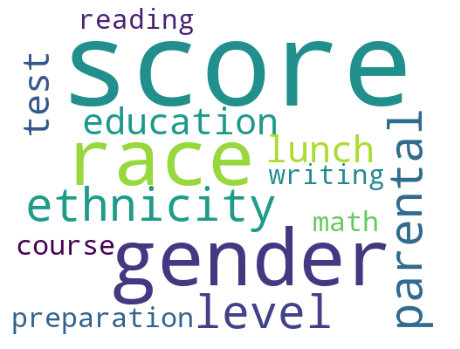

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/StudentsPerformance.csv')
plt.subplots(figsize=(8,8))
wordcloud=WordCloud(
    background_color='white',
    width=512,
    height=384).generate(' '.join(data))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [8]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [11]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
def outlier_detection(df,columns):
    outlier_indices=[]
    for x in columns:
        Q1=np.percentile(df[x],25)
        Q3=np.percentile(df[x],75)
        IQR=Q3-Q1
        # Outlier step
        outlier_step=IQR*1.5
        # detect outlier and their indeces
        outlier_list_col=df[(df[x]<Q1-outlier_step) | (df[df[x]>outlier_step+Q3])].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices=Counter(outlier_list_col)
    
    multiple_outliers=list(i for i, v in outlier_indices.items() if v>1)
    
    return multiple_outliers
data.loc[outlier_detection(data,['math score','reading score','writing score'])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


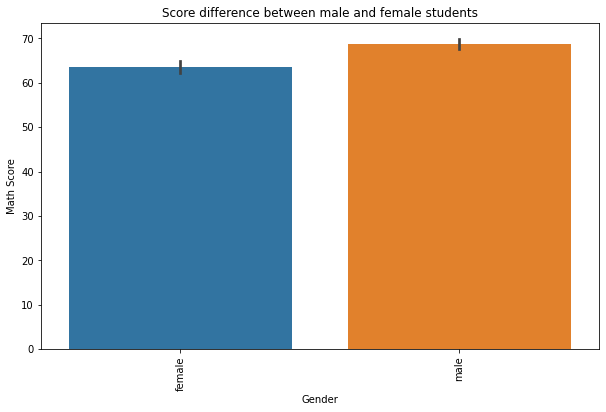

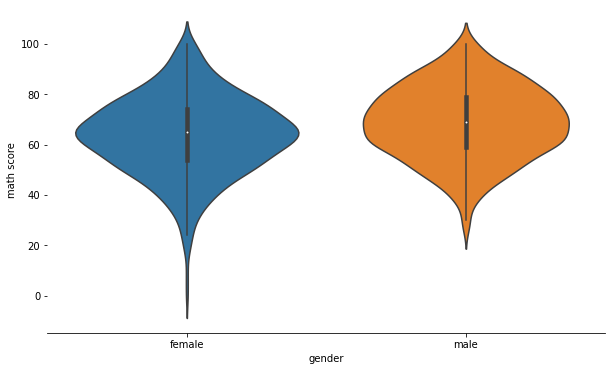

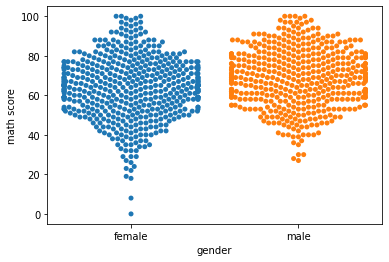

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['gender'],y=data['math score'])
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Score difference between male and female students')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x=data['gender'],y=data['math score'],split=True)
sns.despine(left=True)
plt.show()

sns.swarmplot(x=data['gender'],y=data['math score'])
plt.show()

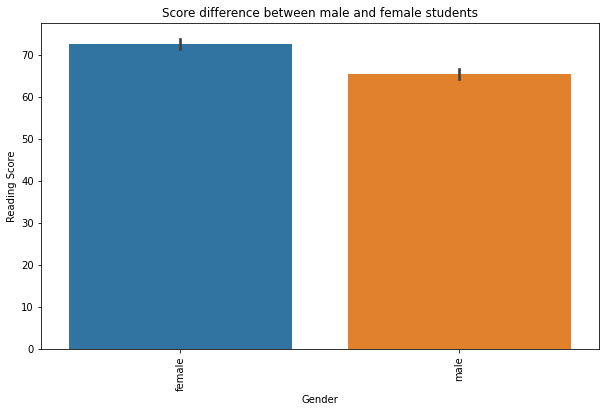

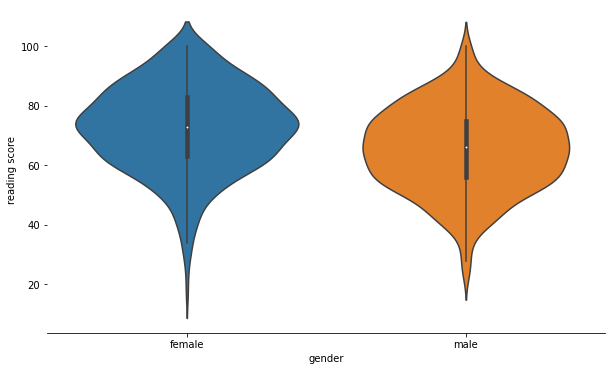

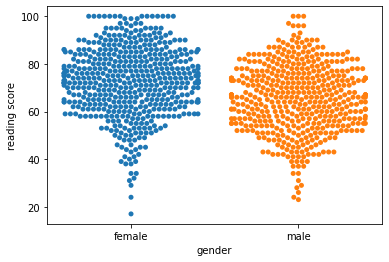

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['gender'],y=data['reading score'])
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.title('Score difference between male and female students')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x=data['gender'],y=data['reading score'],split=True)
sns.despine(left=True)
plt.show()

sns.swarmplot(x=data['gender'],y=data['reading score'])
plt.show()

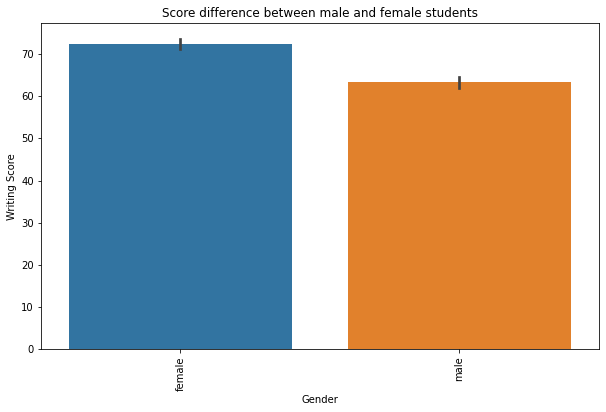

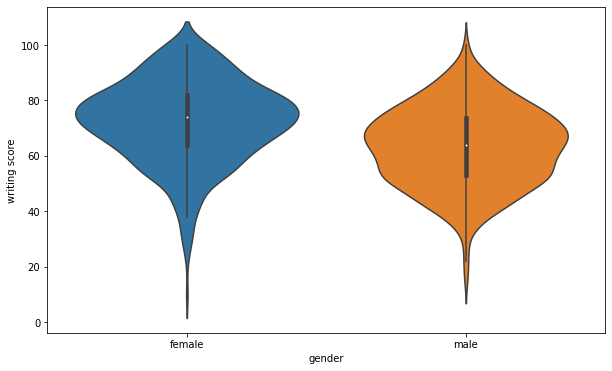

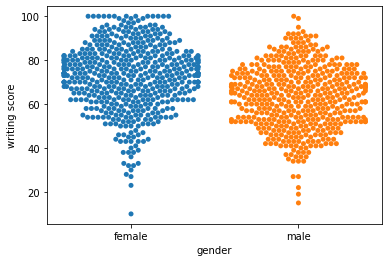

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['gender'],y=data['writing score'])
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.title('Score difference between male and female students')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x=data['gender'],y=data['writing score'])
plt.show()

sns.swarmplot(x=data['gender'],y=data['writing score'])
plt.show()

In [16]:
trace0=go.Box(
    y=data['math score'],
    name='Math Score',
    marker=dict(color='rgb(12,12,140)',
)
)
trace1=go.Box(
    y=data['writing score'],
    name='Writing Score',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
trace2=go.Box(
    y=data['reading score'],
    name='Reading Score',
    marker = dict(
        color = 'rgb(12, 105, 130)',
    )
)

data2=[trace0,trace1,trace2]
iplot(data2)

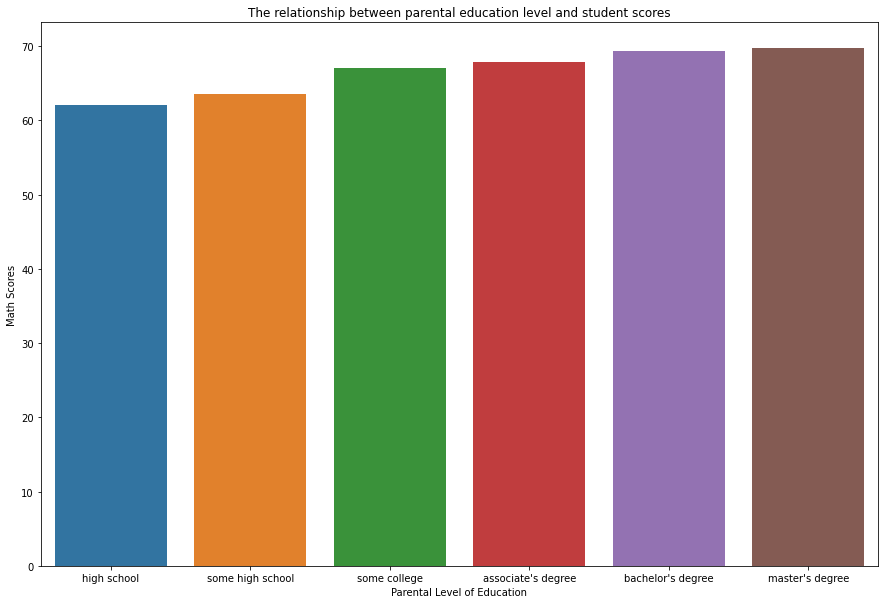

In [17]:
parental_education_list=list(data['parental level of education'].unique())
math_scores=[]
for i in parental_education_list:
    a=data[data['parental level of education']==i]
    math_score_rate=sum(a['math score'])/len(a)
    math_scores.append(math_score_rate)
    
data2=pd.DataFrame({'parental education list':parental_education_list,'math_score':math_scores})
new_index = (data2['math_score'].sort_values(ascending=True)).index.values
sorted_data2=data2.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['parental education list'],y=sorted_data2['math_score'])

plt.xlabel('Parental Level of Education')
plt.ylabel('Math Scores')
plt.title("The relationship between parental education level and student scores")
plt.show()

In [18]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/StudentsPerformance.csv')
data_female=data[data['gender']=='female']
data_male=data[data['gender']=='male']

trace1=go.Bar(
    x=data_female['parental level of education'],
    y=data_female.value_counts(),
    name='Female',
    marker=dict(color='rgba(255,174,255,0.5)',line=dict(color='rgb(0,0,0)',width=0.01)),
)

trace2=go.Bar(
    x=data_male['parental level of education'],
    y=data_male.value_counts(),
    name='Male',
    marker=dict(color='rgba(255,255,128,0.5)',line=dict(color='rgba(0,0,0)',width=0.01)),
)

data=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [19]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/StudentsPerformance.csv')

fig={
    'data':[
        {
            'values':data[data['test preparation course']=='none'].value_counts(),
            'labels':data['race/ethnicity'],
            'domain':{'x':[0,.5],},
            'hoverinfo':'label+percent',
            'hole':0.3,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'Nones',
        'annotations':[
            {
                'font':{'size':20},
                'showarrow':False,
                'text':'Pie',
                'x':0.5,
                'y':1
            }
        ]
    }
}
iplot(fig)
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/StudentsPerformance.csv')

fig={
    'data':[
        {
            'values':data[data['test preparation course']=='completed'].value_counts(),
            'labels':data['race/ethnicity'],
            'domain':{'x':[0,.5],},
            'hoverinfo':'label+percent',
            'hole':0.3,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'Completeds',
        'annotations':[
            {
                'font':{'size':20},
                'showarrow':False,
                'text':'Pie',
                'x':0.5,
                'y':1
            }
        ]
    }
}
iplot(fig)